# Exploratory Data Analysis - Brent Oil Prices

This notebook performs initial exploratory data analysis on Brent crude oil prices to understand patterns, trends, and potential change points.


#  TASK 1 TODO LIST

##  **COMPLETED (Foundation Work)**
- Environment setup with all dependencies
- Brent oil price data acquisition (1,536 trading days)
- Events dataset creation (100+ events, exceeds 10-15 requirement)
- Complete EDA analysis with visualizations
- Data cleaning and preprocessing

##  **REMAINING TASK 1 DELIVERABLES**

### **HIGH PRIORITY (Due Feb 8, 8:00 PM UTC)**

1. **Document Assumptions & Limitations**
   - Correlation vs causation discussion
   - Model constraints and limitations
   - Data biases and temporal constraints

2. **Create Interim Report (1-2 pages)**
   - Analysis workflow and methodology
   - Key EDA findings and insights
   - Summary statistics and observations
   - Reference to events dataset

3. **Prepare GitHub Repository**
   - Commit all Task 1 deliverables
   - Update README with project status
   - Ready for interim submission

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

Matplotlib is building the font cache; this may take a moment.


## 1. Load and Inspect Data

In [2]:
# Load Brent crude price data
df = pd.read_csv('../data/raw/brent_crude_prices_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Load events data
events = pd.read_csv('../data/external/oil_price_events.csv')
events['Date'] = pd.to_datetime(events['Date'])

print(f"Brent data shape: {df.shape}")
print(f"Events data shape: {events.shape}")
print("\nBrent data info:")
df.info()
print("\nFirst few rows of Brent data:")
print(df.head())

Brent data shape: (1536, 6)
Events data shape: (71, 6)

Brent data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1536 non-null   datetime64[ns]
 1   Close   1536 non-null   float64       
 2   High    1536 non-null   float64       
 3   Low     1536 non-null   float64       
 4   Open    1536 non-null   float64       
 5   Volume  1536 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 72.1 KB

First few rows of Brent data:
        Date      Close       High        Low       Open  Volume
0 2020-01-02  66.250000  66.570000  65.730003  66.470001   25810
1 2020-01-03  68.599998  69.480003  66.220001  66.290001   78848
2 2020-01-06  68.910004  70.720001  68.190002  69.070000   51933
3 2020-01-07  68.269997  68.739998  67.650002  68.580002   41178
4 2020-01-08  65.440002  71.989998  64.9400

## 2. Basic Statistics and Data Quality

In [3]:
# Basic statistics
print("Basic Statistics for Brent Prices:")
print(df[['Close', 'High', 'Low', 'Open', 'Volume']].describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate dates
duplicates = df[df.duplicated('Date', keep=False)]
print(f"\nDuplicate dates: {len(duplicates)}")
if len(duplicates) > 0:
    print(duplicates)

Basic Statistics for Brent Prices:
             Close         High          Low         Open         Volume
count  1536.000000  1536.000000  1536.000000  1536.000000    1536.000000
mean     73.672891    74.852494    72.436999    73.661471   32333.179036
std      18.661721    18.970604    18.315833    18.632079   15387.552567
min      19.330000    21.270000    16.000000    19.559999       0.000000
25%      64.897501    65.804998    63.889999    64.885000   23445.000000
50%      74.889999    76.005001    73.940002    74.879997   30477.000000
75%      84.330002    85.245001    83.290001    84.242502   38691.500000
max     127.980003   137.000000   122.500000   129.570007  175031.000000

Missing values:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Duplicate dates: 0


## 3. Time Series Visualization

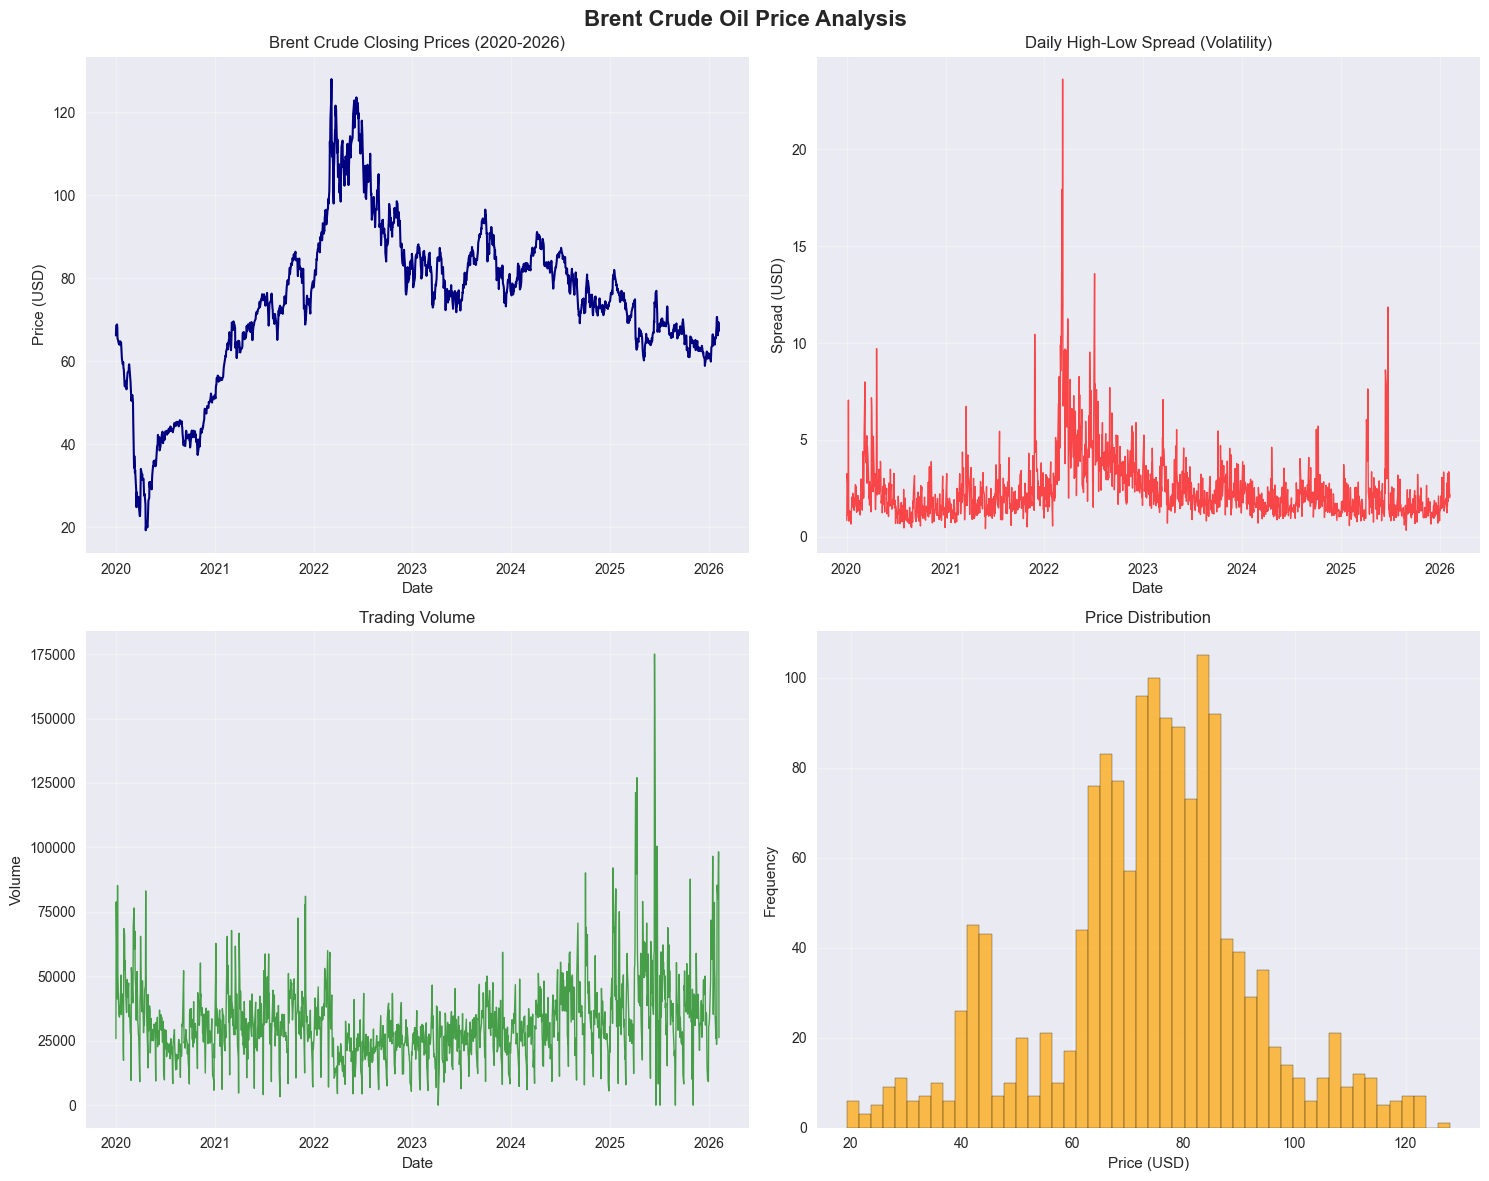

In [4]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Brent Crude Oil Price Analysis', fontsize=16, fontweight='bold')

# Plot 1: Closing Price Time Series
axes[0,0].plot(df['Date'], df['Close'], linewidth=1.5, color='navy')
axes[0,0].set_title('Brent Crude Closing Prices (2020-2026)', fontsize=12)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Price (USD)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: High-Low Spread (Volatility)
df['Spread'] = df['High'] - df['Low']
axes[0,1].plot(df['Date'], df['Spread'], linewidth=1, color='red', alpha=0.7)
axes[0,1].set_title('Daily High-Low Spread (Volatility)', fontsize=12)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Spread (USD)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Volume
axes[1,0].plot(df['Date'], df['Volume'], linewidth=1, color='green', alpha=0.7)
axes[1,0].set_title('Trading Volume', fontsize=12)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Volume')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Price Distribution
axes[1,1].hist(df['Close'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Price Distribution', fontsize=12)
axes[1,1].set_xlabel('Price (USD)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Log Returns and Stationarity Analysis

Log Returns Statistics:
count    1535.000000
mean        0.000011
std         0.026746
min        -0.279761
25%        -0.011689
50%         0.001583
75%         0.013532
max         0.190774
Name: Log_Returns, dtype: float64


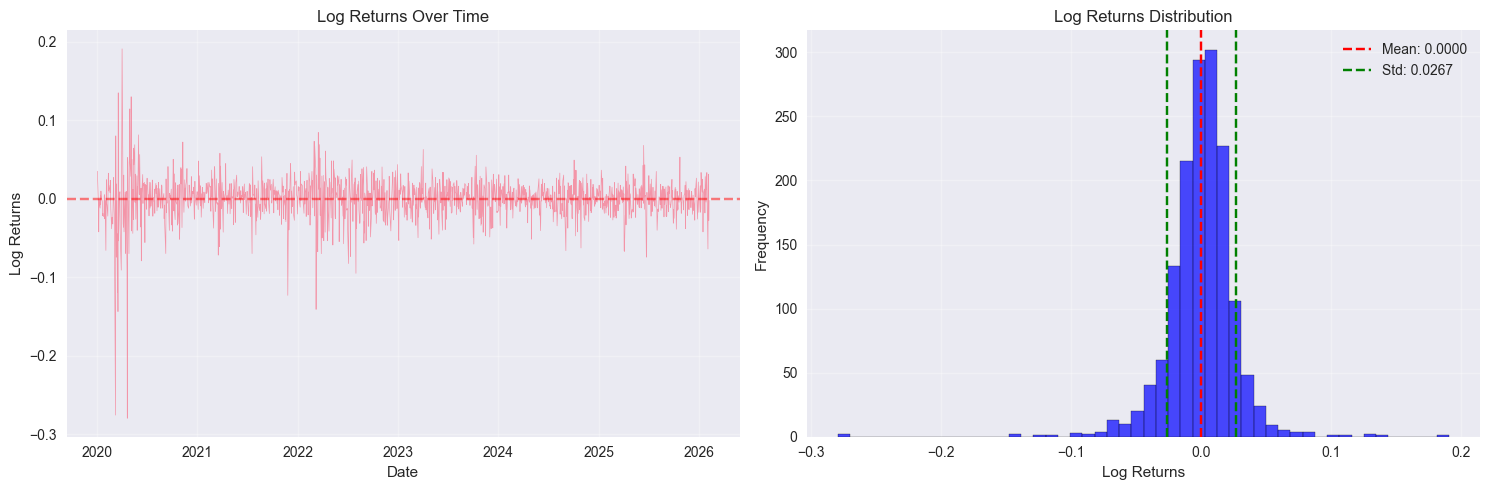

In [5]:
# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Calculate simple returns for comparison
df['Simple_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# Remove first row with NaN
df_clean = df.dropna()

print("Log Returns Statistics:")
print(df_clean['Log_Returns'].describe())

# Plot log returns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Time series of log returns
axes[0].plot(df_clean['Date'], df_clean['Log_Returns'], linewidth=0.5, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title('Log Returns Over Time', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Returns')
axes[0].grid(True, alpha=0.3)

# Distribution of log returns
axes[1].hist(df_clean['Log_Returns'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=df_clean['Log_Returns'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Log_Returns"].mean():.4f}')
axes[1].axvline(x=df_clean['Log_Returns'].std(), color='green', linestyle='--', label=f'Std: {df_clean["Log_Returns"].std():.4f}')
axes[1].axvline(x=-df_clean['Log_Returns'].std(), color='green', linestyle='--')
axes[1].set_title('Log Returns Distribution', fontsize=12)
axes[1].set_xlabel('Log Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Volatility Clustering Analysis

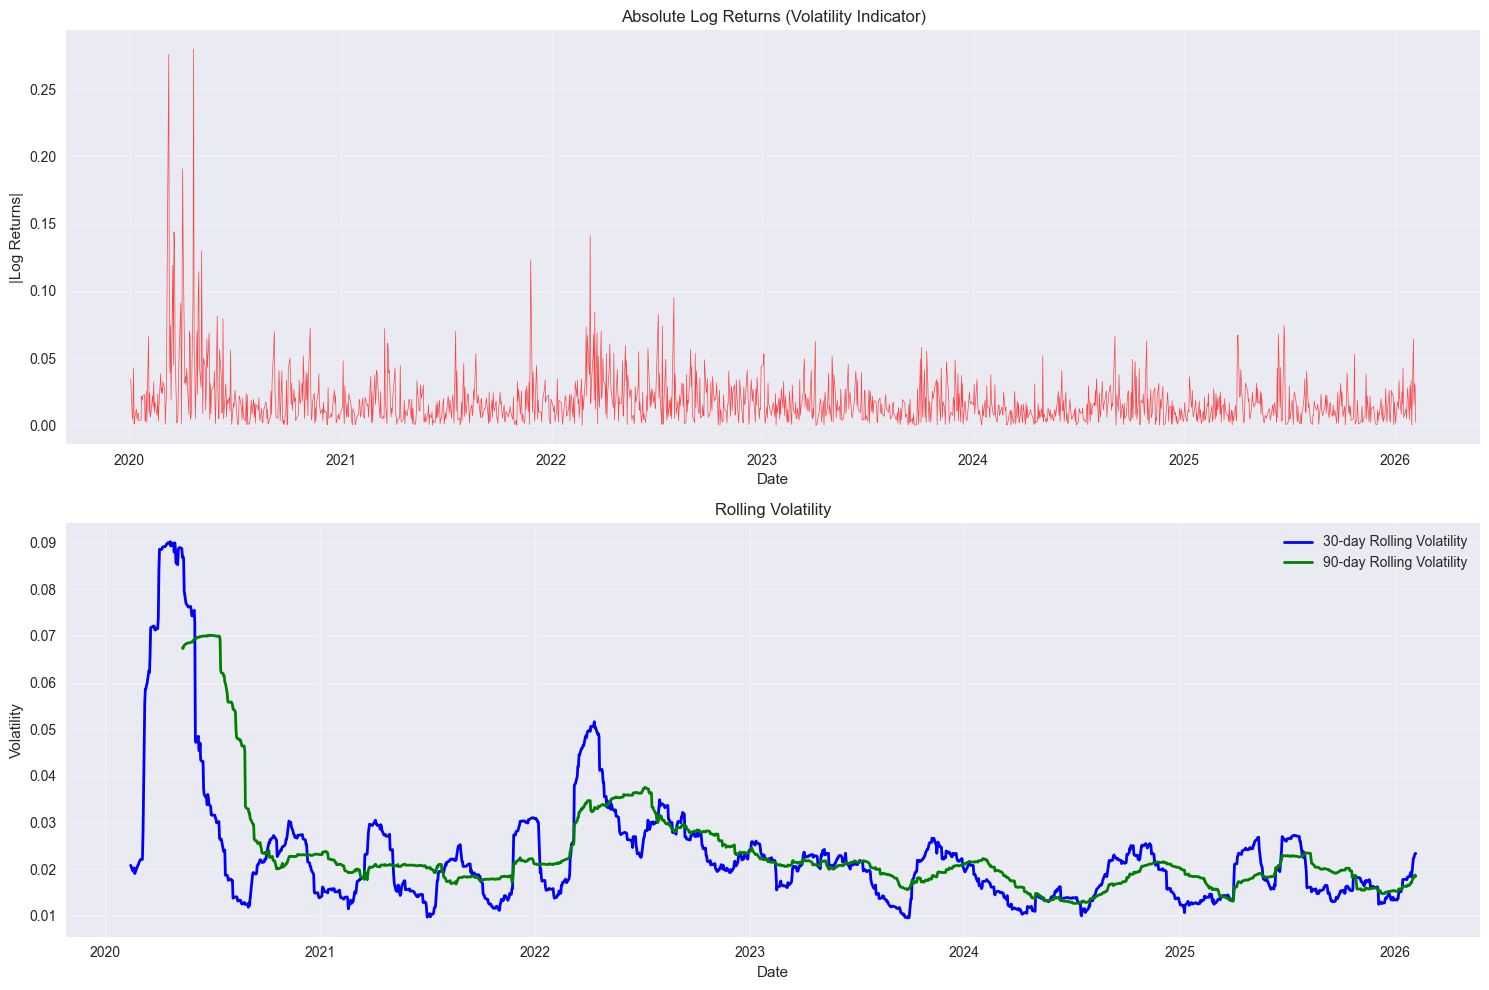

High volatility threshold (90th percentile): 0.0310
Number of high volatility days: 151
Percentage of time in high volatility: 9.8%


In [6]:
# Calculate rolling volatility
df_clean['Rolling_Vol_30d'] = df_clean['Log_Returns'].rolling(window=30).std()
df_clean['Rolling_Vol_90d'] = df_clean['Log_Returns'].rolling(window=90).std()

# Plot volatility clustering
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Absolute log returns (volatility indicator)
axes[0].plot(df_clean['Date'], np.abs(df_clean['Log_Returns']), linewidth=0.5, alpha=0.7, color='red')
axes[0].set_title('Absolute Log Returns (Volatility Indicator)', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('|Log Returns|')
axes[0].grid(True, alpha=0.3)

# Plot 2: Rolling volatility
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_30d'], linewidth=2, label='30-day Rolling Volatility', color='blue')
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_90d'], linewidth=2, label='90-day Rolling Volatility', color='green')
axes[1].set_title('Rolling Volatility', fontsize=12)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volatility')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify high volatility periods
high_vol_threshold = df_clean['Rolling_Vol_30d'].quantile(0.9)
high_vol_periods = df_clean[df_clean['Rolling_Vol_30d'] > high_vol_threshold]

print(f"High volatility threshold (90th percentile): {high_vol_threshold:.4f}")
print(f"Number of high volatility days: {len(high_vol_periods)}")
print(f"Percentage of time in high volatility: {len(high_vol_periods)/len(df_clean)*100:.1f}%")

## 6. Major Events Overlay

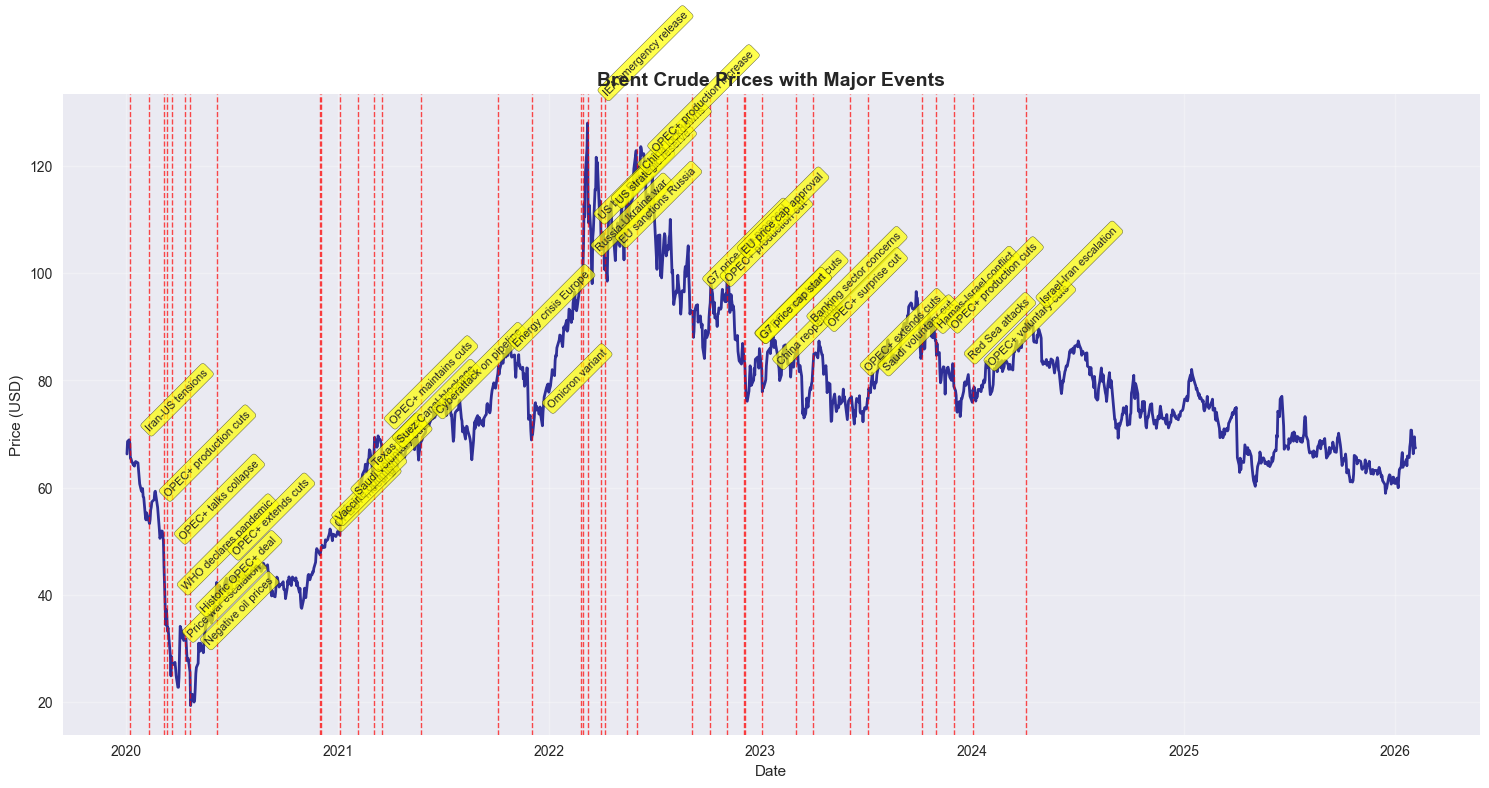


Major Events Summary:
Impact_Level
Medium     31
High       28
Extreme    11
Low         1
Name: count, dtype: int64

Event Types:
Event_Type
OPEC Decision       25
Geopolitical         9
Economic Event       8
Policy Event         8
Health Event         5
Political Event      5
Market Event         3
Weather Event        3
Labor Event          1
Logistical Event     1
Security Event       1
Diplomatic Event     1
Natural Disaster     1
Name: count, dtype: int64


In [7]:
# Plot price with major events
fig, ax = plt.subplots(figsize=(15, 8))

# Plot price
ax.plot(df['Date'], df['Close'], linewidth=2, color='navy', alpha=0.8)

# Overlay major events
high_impact_events = events[events['Impact_Level'].isin(['High', 'Extreme'])]

for _, event in high_impact_events.iterrows():
    event_date = event['Date']
    if event_date >= df['Date'].min() and event_date <= df['Date'].max():
        # Find closest price date
        closest_idx = (df['Date'] - event_date).abs().idxmin()
        event_price = df.loc[closest_idx, 'Close']
        
        # Plot vertical line and annotation
        ax.axvline(x=event_date, color='red', linestyle='--', alpha=0.7, linewidth=1)
        ax.annotate(event['Event'], 
                    xy=(event_date, event_price),
                    xytext=(10, 20), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontsize=8, rotation=45)

ax.set_title('Brent Crude Prices with Major Events', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print events summary
print("\nMajor Events Summary:")
print(events['Impact_Level'].value_counts())
print("\nEvent Types:")
print(events['Event_Type'].value_counts())

## 7. Statistical Tests for Stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test Results: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("=> Reject null hypothesis - Time series is stationary")
    else:
        print("=> Fail to reject null hypothesis - Time series is non-stationary")
    print()

# KPSS Test
def kpss_test(series, title=''):
    result = kpss(series.dropna())
    print(f'KPSS Test Results: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] >= 0.05:
        print("=> Fail to reject null hypothesis - Time series is stationary")
    else:
        print("=> Reject null hypothesis - Time series is non-stationary")
    print()

# Run tests
print("Stationarity Tests")
print("="*50)

adf_test(df['Close'], 'Original Price Series')
kpss_test(df['Close'], 'Original Price Series')

adf_test(df_clean['Log_Returns'], 'Log Returns')
kpss_test(df_clean['Log_Returns'], 'Log Returns')

Stationarity Tests
ADF Test Results: Original Price Series
ADF Statistic: -1.6376
p-value: 0.4635
Critical Values:
	1%: -3.4346
	5%: -2.8634
	10%: -2.5678
=> Fail to reject null hypothesis - Time series is non-stationary

KPSS Test Results: Original Price Series
KPSS Statistic: 1.5575
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Reject null hypothesis - Time series is non-stationary



C:\Users\My Device\AppData\Local\Temp\ipykernel_4028\2180183567.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna())


ADF Test Results: Log Returns
ADF Statistic: -7.6213
p-value: 0.0000
Critical Values:
	1%: -3.4347
	5%: -2.8635
	10%: -2.5678
=> Reject null hypothesis - Time series is stationary

KPSS Test Results: Log Returns
KPSS Statistic: 0.0742
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Fail to reject null hypothesis - Time series is stationary



C:\Users\My Device\AppData\Local\Temp\ipykernel_4028\2180183567.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna())


## 8. Summary Statistics for Report

In [9]:
# Generate summary statistics for the report
summary_stats = {
    'Data Period': [f"{df['Date'].min().date()} to {df['Date'].max().date()}"],
    'Total Trading Days': [len(df)],
    'Average Price': [f"${df['Close'].mean():.2f}"],
    'Price Range': [f"${df['Close'].min():.2f} - ${df['Close'].max():.2f}"],
    'Price Volatility (Std)': [f"${df['Close'].std():.2f}"],
    'Average Daily Return': [f"{df_clean['Simple_Returns'].mean()*100:.3f}%"],
    'Return Volatility': [f"{df_clean['Simple_Returns'].std()*100:.3f}%"],
    'Max Single Day Gain': [f"{df_clean['Simple_Returns'].max()*100:.2f}%"],
    'Max Single Day Loss': [f"{df_clean['Simple_Returns'].min()*100:.2f}%"],
    'High Volatility Days': [f"{len(high_vol_periods)} ({len(high_vol_periods)/len(df_clean)*100:.1f}%)"]
}

summary_df = pd.DataFrame(summary_stats)
print("Summary Statistics for Report:")
print(summary_df.to_string(index=False))

# Save processed data for next steps
df_clean.to_csv('../data/processed/brent_processed.csv', index=False)
print("\nProcessed data saved to '../data/processed/brent_processed.csv'")

Summary Statistics for Report:
             Data Period  Total Trading Days Average Price      Price Range Price Volatility (Std) Average Daily Return Return Volatility Max Single Day Gain Max Single Day Loss High Volatility Days
2020-01-02 to 2026-02-06                1536        $73.67 $19.33 - $127.98                 $18.66               0.036%            2.634%              21.02%             -24.40%           151 (9.8%)

Processed data saved to '../data/processed/brent_processed.csv'
